<a href="https://colab.research.google.com/github/BaruchMM/Analisis-de-articulos-estadisticos-usando-R/blob/main/algunos_algoritmos_para_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FastICA

In [30]:
install.packages('fastICA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
library(fastICA)

Definimos las señales $S_1(m)$ y $S_2(m)$ y con eso, definimos una matriz de combinación A que al aplicarlo a S, nos de $X$, tal que $$X=A \phantom{l}S$$

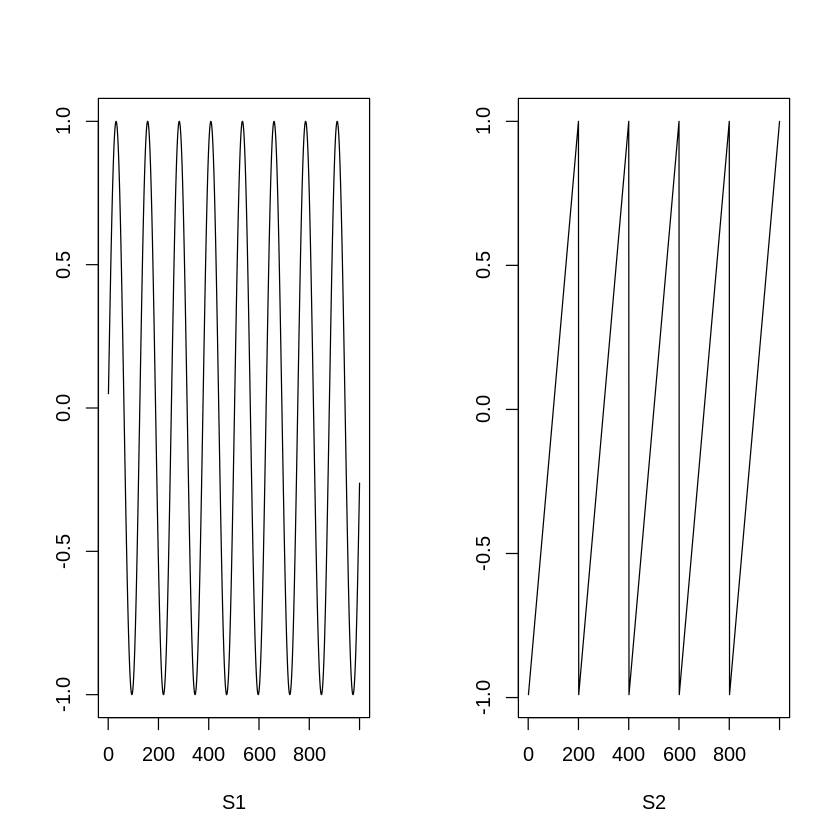

In [32]:
# Source matrix
S <- cbind(sin((1:1000)/20), rep((((1:200)-100)/100), 5))
# Mixing matrix
A <- matrix(c(0.291, 0.6557, -0.5439, 0.5572), 2, 2)
# plot graphs
par(mfcol = c(1, 2))
plot(1:1000, S[,1], type = "l",xlab = "S1", ylab = "")
plot(1:1000, S[,2], type = "l", xlab = "S2", ylab = "")

Aplicamos la matriz de combinación sobre $S$ para obtener $X$ y obtenemos las siguientes dos señales.

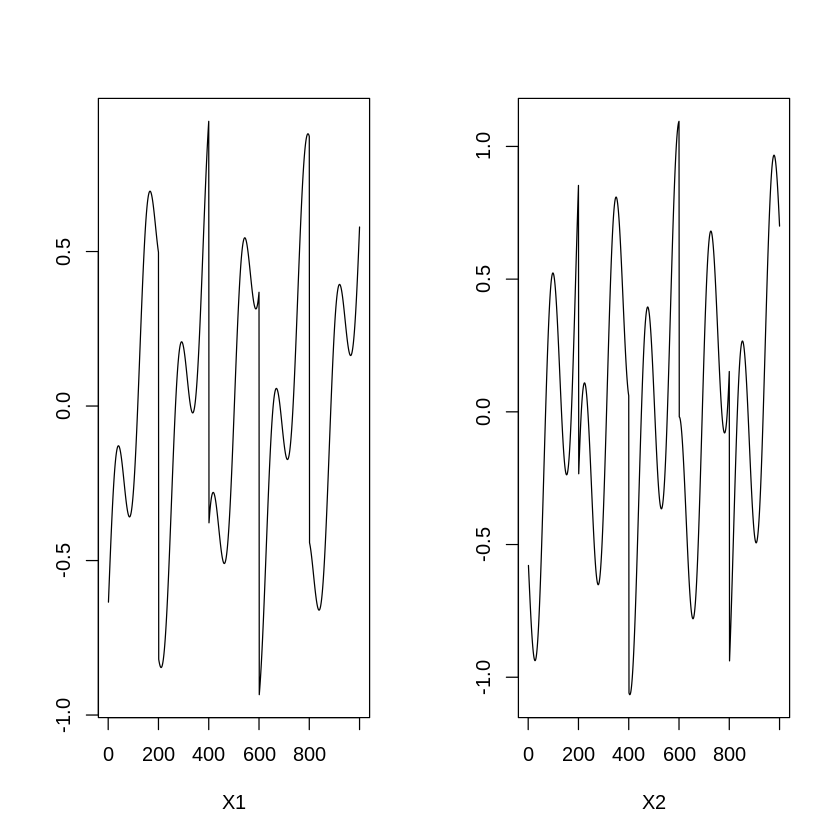

In [33]:
# Mixed two signals
X <- S %*% A

par(mfcol = c(1, 2))
plot(1:1000, X[,1], type = "l",xlab = "X1", ylab = "")
plot(1:1000, X[,2], type = "l", xlab = "X2", ylab = "")

A partir de aquí es donde se utiliza el FastICA. Suponiendo que tenemos la observación de $X$, podemos encontrar una aproximación numérica de la señal original S, utilizando la librería fastICA.

In [34]:
a <- fastICA(X, 2, alg.typ = "parallel", method = "R", row.norm = FALSE, 
              maxit = 200, tol = 0.0001, verbose = TRUE)

Centering

Whitening

Symmetric FastICA using logcosh approx. to neg-entropy function

Iteration 1 tol = 0.1104493

Iteration 2 tol = 0.01067225

Iteration 3 tol = 8.744336e-06



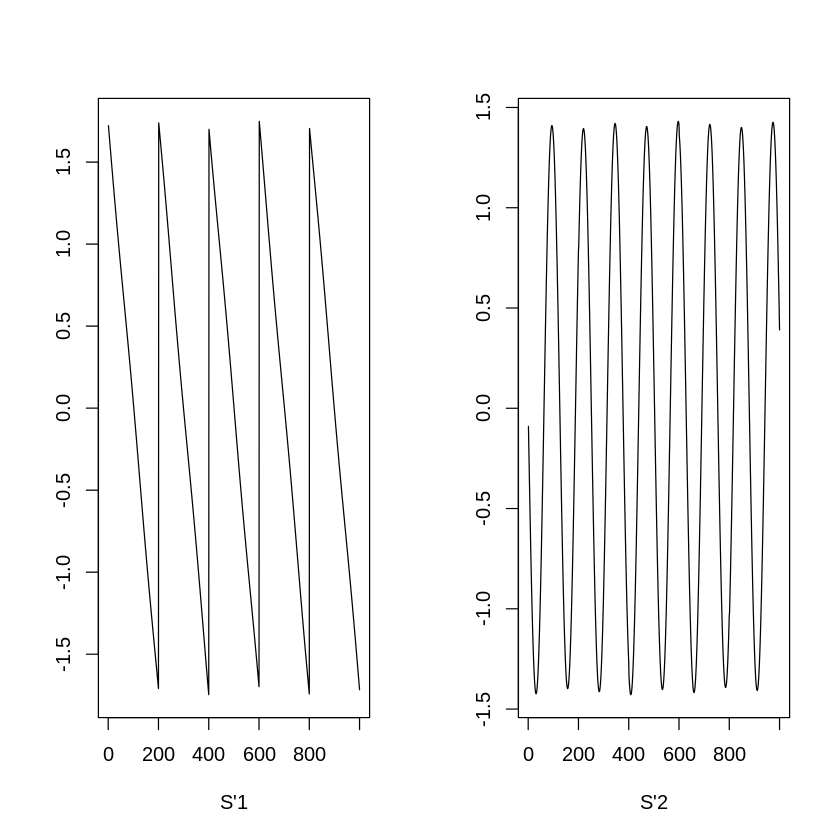

In [35]:
par(mfcol = c(1, 2))
plot(1:1000, a$S[,1], type = "l", xlab = "S'1", ylab = "")
plot(1:1000, a$S[,2], type = "l", xlab = "S'2", ylab = "")

## INFOMAX

In [11]:
install.packages('ica')
library(ica)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



INFOMAX tiene como objetivo encontrar la matriz $W$ tal que $S=W\phantom{l}X$. Usando R, existe la función icaimax, la cual necesita una matriz aleatoria de dimensiones de la cantidad de señales y de la funcion, obtenemos directamente las señales $S$.


Usamos dos señales originales 

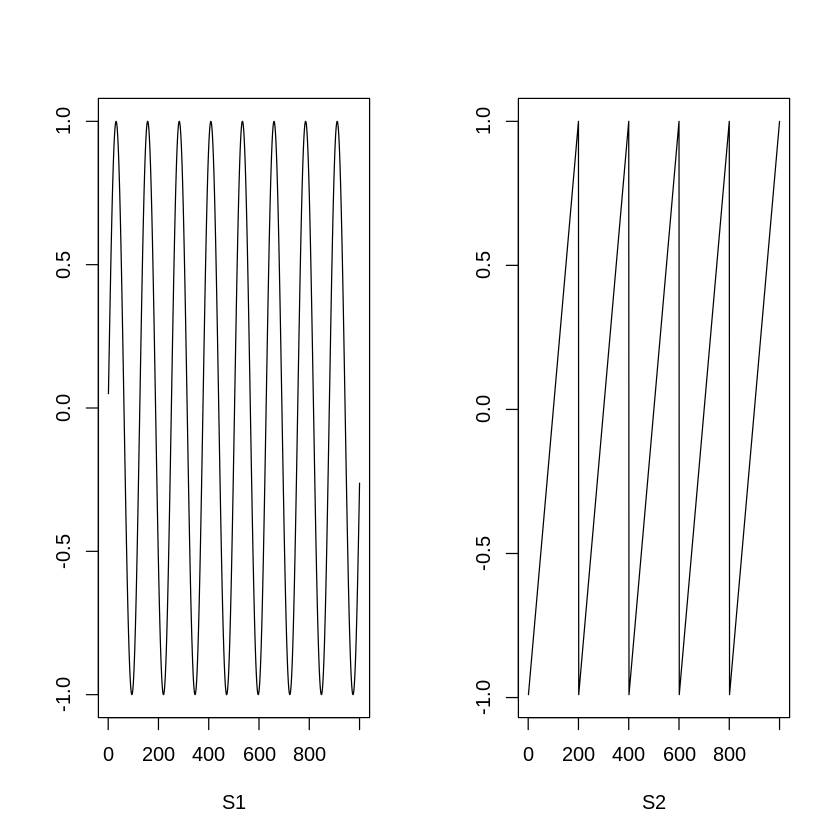

In [105]:
S <- cbind(sin((1:1000)/20), rep((((1:200)-100)/100), 5))
par(mfcol = c(1, 2))
plot(1:1000, S[,1], type = "l",xlab = "S1", ylab = "")
plot(1:1000, S[,2], type = "l", xlab = "S2", ylab = "")

Definimos una matriz de mezcla

In [106]:
 A <- matrix(c(0.291, 0.6557, -0.5439, 0.5572), 2, 2)

Mezclamos las señales

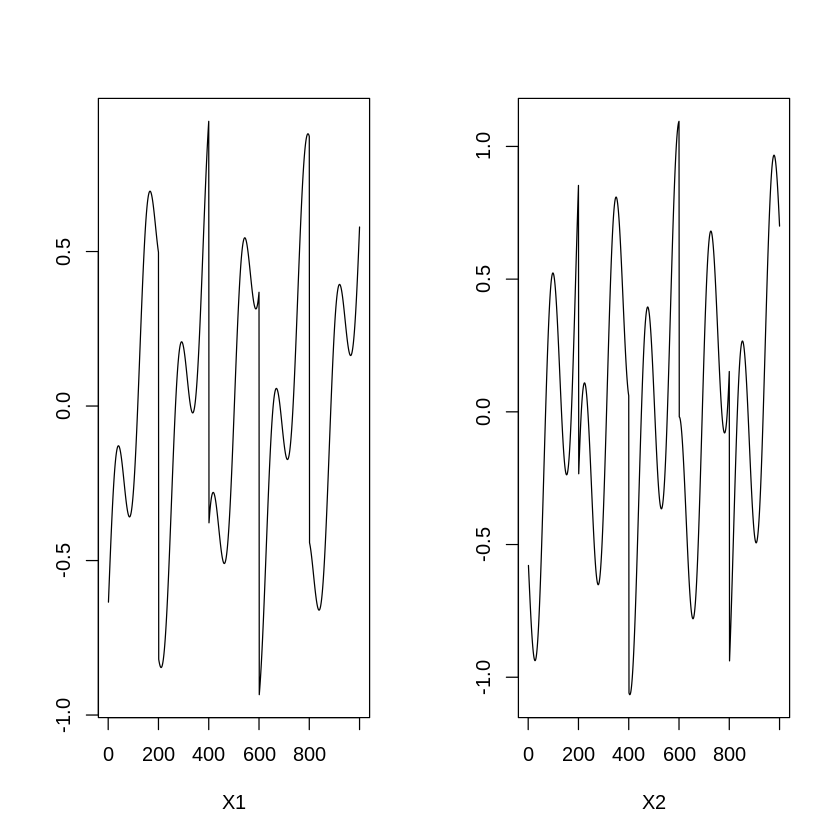

In [ ]:
X <- S %*% A
par(mfcol = c(1, 2))
plot(1:1000, X[,1], type = "l",xlab = "X1", ylab = "")
plot(1:1000, X[,2], type = "l", xlab = "X2", ylab = "")

Ahora, definimos la primera matriz aleatoria de la cual se obtendra la matriz W final.

In [68]:
Bmat <- matrix(2*runif(200),100,2)

Aplicamos la función icaimax sobre el producto de la matriz Bmat y Amat, de ella podemos obtener directamente las aproximaciones de las señales originales S y además una matriz de correlación entre las señales desmezcladas.

In [111]:
Xmat <- tcrossprod(X,Bmat)
imod <- icaimax(Xmat,2)
cor(X,imod$S)

0.8859794,-0.4637247
0.6294645,0.7770293


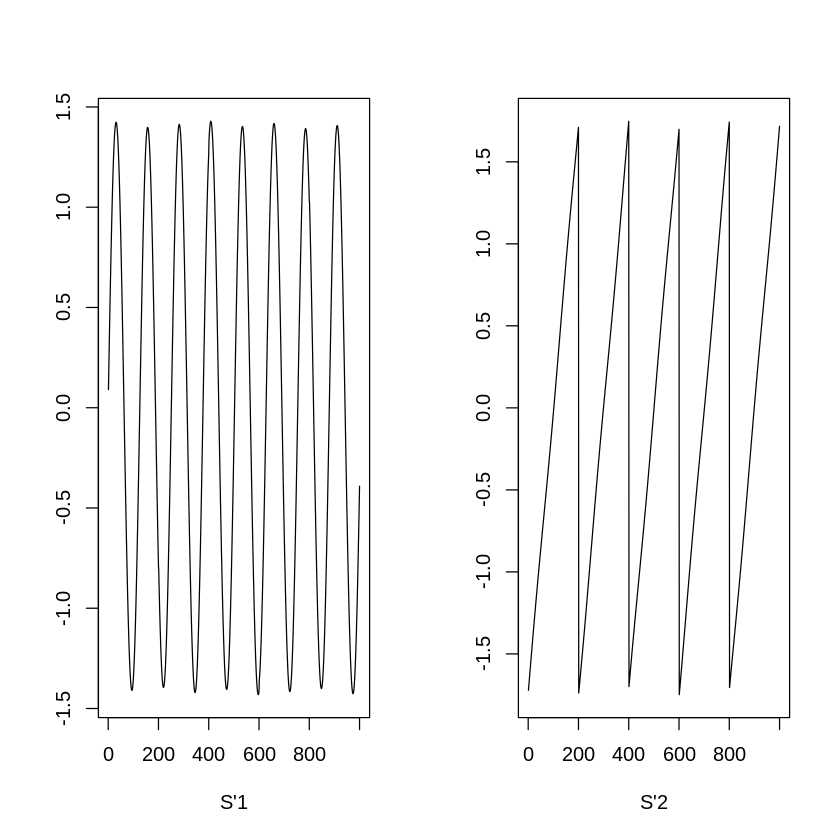

In [109]:
par(mfcol = c(1, 2))
plot(1:1000, imod$S[,2], type = "l", xlab = "S'1", ylab = "")
plot(1:1000, imod$S[,1], type = "l", xlab = "S'2", ylab = "")

## JADE 

JADE funciona similar a INFOMAX. Usando R, existe la función icajade, la cual necesita una matriz aleatoria de dimensiones de la cantidad de variables y nos puede dar directamente las señales $S$.
Primero definimos la muestra aleatoria de 1000 puntos.

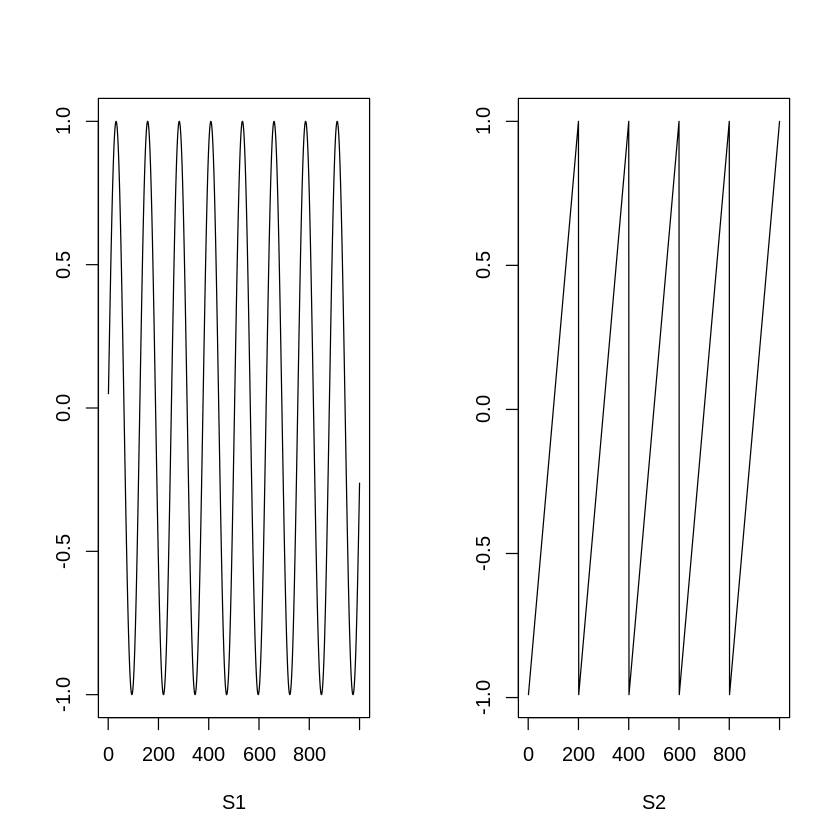

In [97]:
# Source matrix
S <- cbind(sin((1:1000)/20), rep((((1:200)-100)/100), 5))
# Mixing matrix
A <- matrix(c(0.291, 0.6557, -0.5439, 0.5572), 2, 2)
# plot graphs
par(mfcol = c(1, 2))
plot(1:1000, S[,1], type = "l",xlab = "S1", ylab = "")
plot(1:1000, S[,2], type = "l", xlab = "S2", ylab = "")

Mezclamos las dos señales

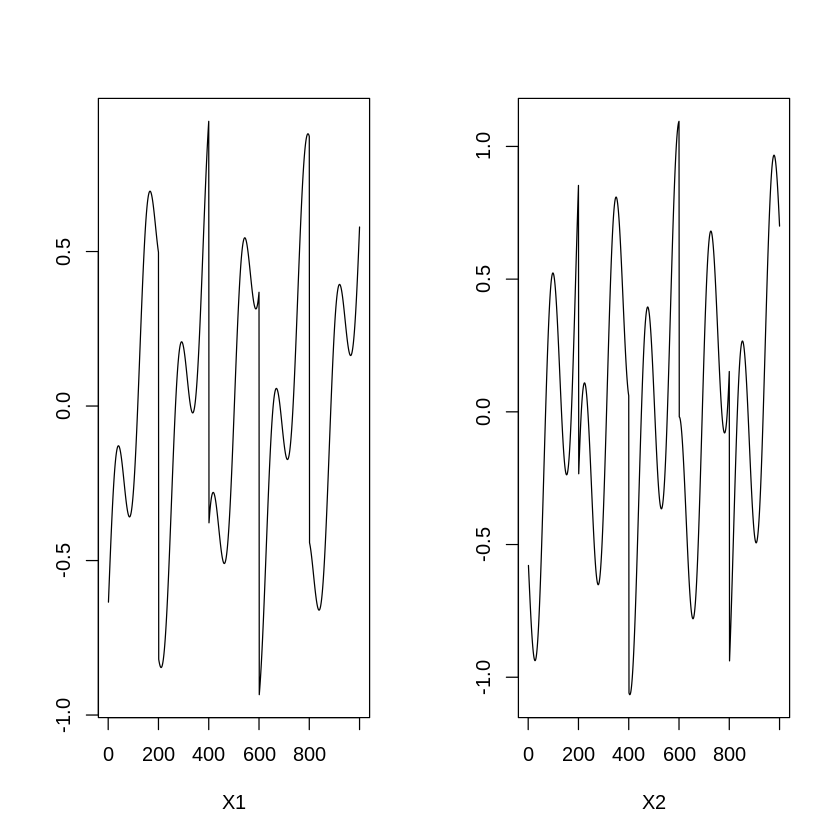

In [98]:
X <- S %*% A
par(mfcol = c(1, 2))
plot(1:1000, X[,1], type = "l",xlab = "X1", ylab = "")
plot(1:1000, X[,2], type = "l", xlab = "X2", ylab = "")

Ahora, definimos la primera matriz aleatoria de la cual se obtendra la matriz W final.

In [110]:
Bmat <- matrix(2*runif(200),100,2)

Aplicamos la función icajade() para encontrar la aproximación de las señales originales.

In [99]:
Xmat <- tcrossprod(X,Bmat)
# ICA via JADE with 2 components
imod <- icajade(Xmat,2)
cor(Amat,imod$S)

0.03377385,0.01016905
0.04054348,-0.01310886


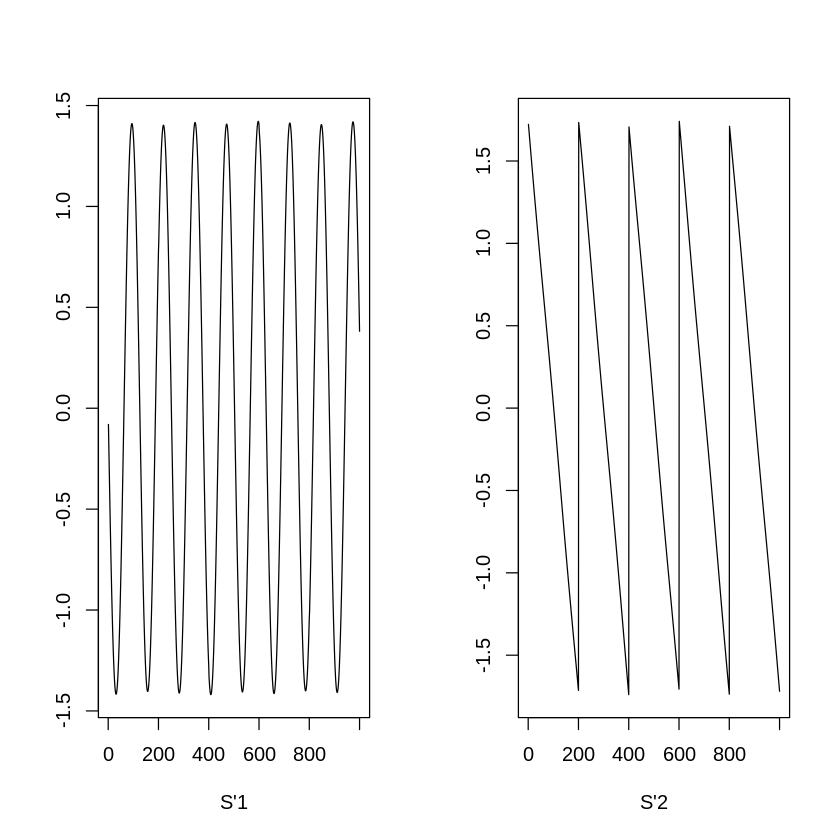

In [101]:
par(mfcol = c(1, 2))
plot(1:1000, imod$S[,2], type = "l", xlab = "S'1", ylab = "")
plot(1:1000, imod$S[,1], type = "l", xlab = "S'2", ylab = "")